# Ejemplo: error del polinomio interpolante de Lagrange

In [4]:
import numpy as np
from matplotlib import pyplot as plt

from numpy.polynomial import polynomial as P
from functools import partial
import math

In [5]:
import interp_tools as it


ModuleNotFoundError: No module named 'interp_tools'

Sea $f(x)=\frac{1}{x}$ 
   

In [ ]:
f = lambda x: 1/x

   y $P(x)$ el polinomio interpolante de Lagrange en los
   puntos $x_0=2, x_1=2.75, x_2=4$ (notar que $n=2$).
   

________

#### Datos:

In [4]:
xd = np.array([2, 2.75, 4])

In [5]:
# xd = np.array([2, 2.34, 2.87, 3.02, 3.45, 3.48, 4])

In [6]:
xd = np.linspace(2, 10, 18)

In [7]:
yd = f(xd)

In [8]:
xi = np.linspace(min(xd), max(xd), 200)
ym = f(xi)

_______

#### Interpolación de Lagrange:

In [9]:
yl = it.interp_lagrange(xi, xd, yd)

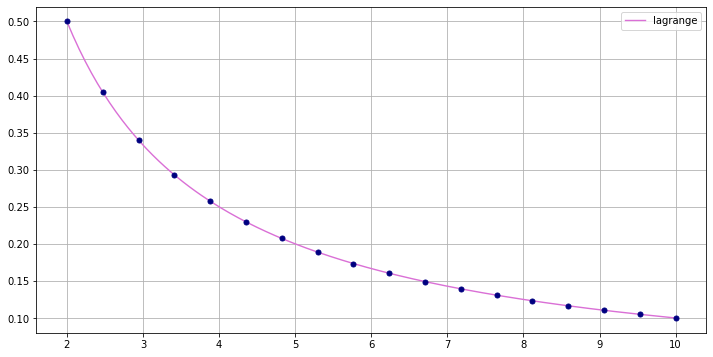

In [10]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.plot(xi, yl, linewidth=1.4, linestyle='-', color='orchid', 
        label='lagrange')
ax.plot(xd, yd, marker='o', linestyle='None', color='navy', markersize=5)
ax.grid()
ax.legend()

_____

#### Análisis del error

   La función cumple con las hipótesis del teorema, sus derivadas son:

   $$f^{(1)}(x) = -\frac{1}{x^2}, 
   \qquad f^{(2)}(x)=2\frac{1}{x^3}, 
   \qquad f^{(3)}(x)=-6\frac{1}{x^4}$$

En general, $$f^{(k)}(x)= (-1)^k k! \frac{1}{x^{(k+1)}} $$

Por el teorema podemos decir que su error $E(x)=f(x)-P(x)$ está dado por:

   \begin{eqnarray*}
      E(x)&=\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-x_0)(x-x_1)...(x-x_n) \\
      &=\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-2)(x-2.75)(x-4) \\
      &=\frac{6}{(\xi(x))^4 3!}(x-2)(x-2.75)(x-4) \\
      &=\frac{1}{\xi(x)^4}(x-2)(x-2.75)(x-4)
   \end{eqnarray*}

para **algún valor de $\xi(x)$**.
Ahora queremos hallar el máximo de $E(x)$ para acotar el error.                   

Para eso vamos a considerar **dos factores**:
    
- $\frac{1}{\xi(x)^4}$
- $(x-2)(x-2.75)(x-4)$

En general, 

- $f^{(n+1)}(x) / (n+1)! = \left[(-1)^{(n+1)} (n+1)! \frac{1}{x^{(n+2)}}\right] \frac{1}{(n+1)!} = (-1)^{(n+1)} \frac{1}{x^{(n+2)}}$

- $(x-x_0)(x-x_1)...(x-x_n)$

In [11]:
def f_xi(x, n):
    # (n+1) es el numero de puntos
    z = pow(-1, n+1) / pow(x, n+2)
    z = abs(z)
    return z

Como 
      $$2 < \xi(x) < 4$$

entonces  $$\xi(x)^4 \ge 1/2^4 = 1/16 = 0.0625$$ para todos los $x \in [2, 4]$

Ahora consideremos 

   $$g(x) = 1/16 (x-2)(x-2.75)(x-4)$$

Esta función tiene puntos críticos en $7/3$ y $7/2$, y el máximo de su valor
   absoluto es $|g(7/2)|=9/16$.

   Por lo tanto, 

   $$E(x)=\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-2)(x-2.75)(x-4) \le \frac{1}{16}
   \frac{9}{16} = 9/256$$
                         

In [12]:
n = len(xd)-1
xi_factor = f_xi(2, n)
print(xi_factor)

1.9073486328125e-06


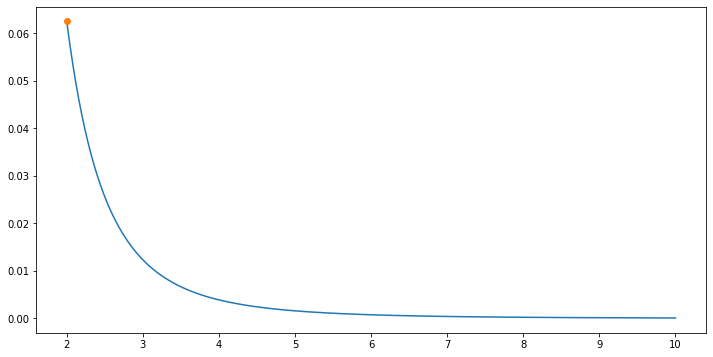

In [13]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

yxi = f_xi(xi, 2)
ax.plot(xi, yxi)
ax.plot(xi[0], yxi[0], 'o')

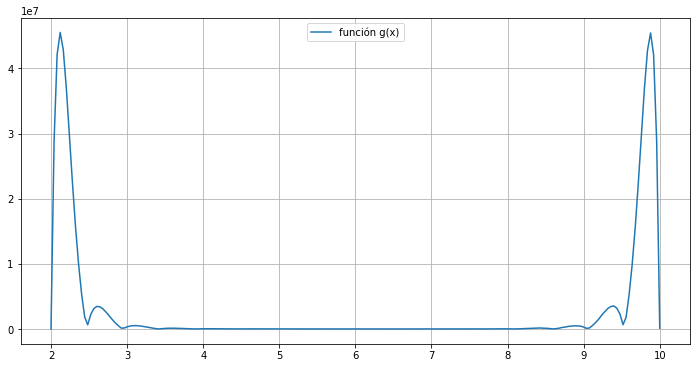

In [14]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

# el polinomio g
coefs = P.polyfromroots(xd)
g = partial(P.polyval, c=coefs)

ax.plot(xi, np.absolute(g(xi)), label='función g(x)')
ax.grid()
ax.legend()

In [15]:
# puntos críticos

coefs_prima = P.polyder(coefs)
gprima = partial(P.polyval, c=coefs_prima)
rs = P.polyroots(coefs_prima)

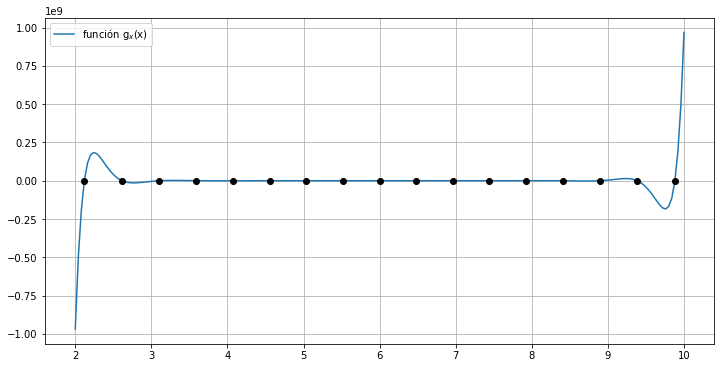

In [16]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.plot(xi, gprima(xi), label=r'función g$_x$(x)')
for r in rs:
    ax.plot(r, gprima(r), 'o', color='k')
ax.grid()
ax.legend()

In [17]:
print(rs[0])
print(rs[1])
for r in rs:
    print(g(r))

2.1193523381372037
2.6149809177580026
-45532399.431640625
3483374.0
-516752.84765625
118610.53125
-38236.51953125
16492.494140625
-9060.5078125
6852.49609375
-5320.818359375
8058.296875
-7361.978515625
22214.2578125
-28891.10546875
127884.14453125
-482586.849609375
3538434.908203125
-45431204.833984375


In [18]:
np.absolute(g(rs))

array([4.55323994e+07, 3.48337400e+06, 5.16752848e+05, 1.18610531e+05,
       3.82365195e+04, 1.64924941e+04, 9.06050781e+03, 6.85249609e+03,
       5.32081836e+03, 8.05829688e+03, 7.36197852e+03, 2.22142578e+04,
       2.88911055e+04, 1.27884145e+05, 4.82586850e+05, 3.53843491e+06,
       4.54312048e+07])

In [19]:
rmax = max(np.absolute(g(rs)))
rmax

45532399.431640625

In [260]:
Em = xi_factor*rmax
print(Em)

0.035156250000000444


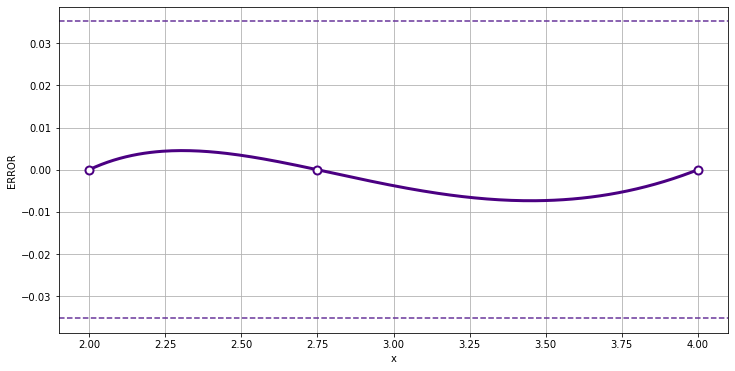

In [263]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(xi, yl-ym, linewidth=3, color='indigo')

ax.plot(xd, [0]*len(xd), marker='o', linestyle='None', color='navy',
        markersize=8, mfc='white', mec='indigo', mew=2)
ax.axhline(Em, color='rebeccapurple', linestyle='--')
ax.axhline(-Em, color='rebeccapurple', linestyle='--')
ax.set_ylabel('ERROR')
ax.set_xlabel('x')
ax.grid()